# Import data

In [30]:
import csv
import numpy as np
import matplotlib.pyplot as plt

indir = '/home/pioneer/shiftdata/'

filename = 'cconstants.csv'
filepath = indir + filename



with open(filepath) as cconstants_file:
    data_iter = csv.reader(cconstants_file,
                           delimiter = ',',
                           quotechar = '"')
    data = [data for data in data_iter]
data_array = np.asarray(data)
energies = data_array[1:,0].astype(float)
runs = data_array[1:,1]
crystals = data_array[1:,2].astype(int)
cconstants = data_array[1:,5].astype(float)


# Plot the calibration constants against the energy

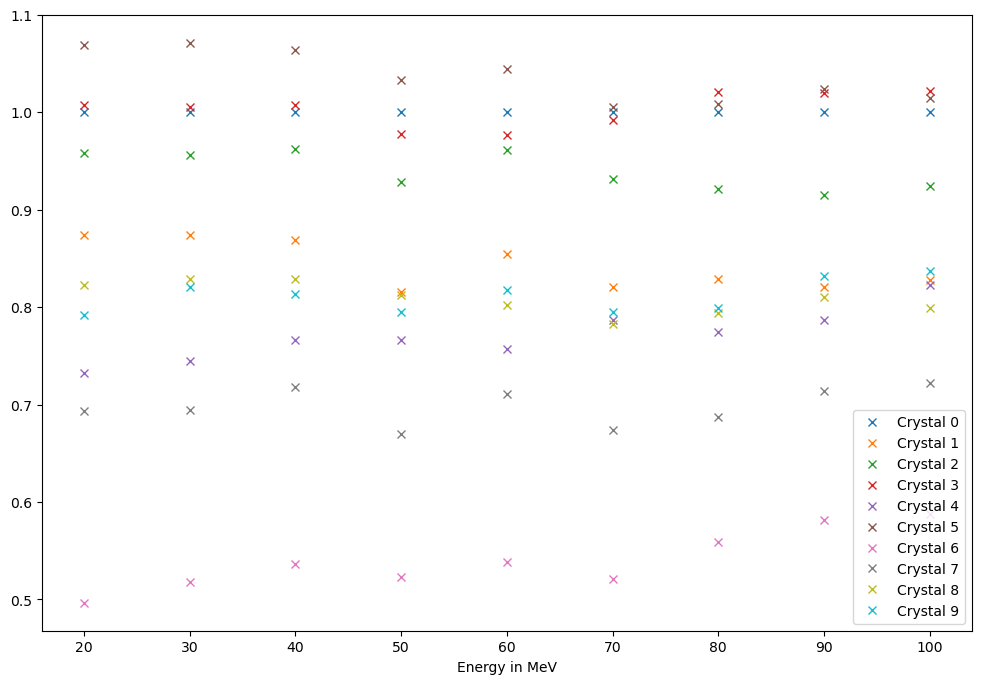

In [37]:
plt.figure(figsize = (12,8))
for crystal in np.unique(crystals):
    xdata = energies[crystals == crystal]
    ydata = cconstants[crystals == crystal]
    plt.plot(xdata,ydata,'x',label = f"Crystal {crystal}")

plt.xlabel("Energy in MeV")
plt.legend()
plt.show()


# Plot the change of calibration constants against the energy

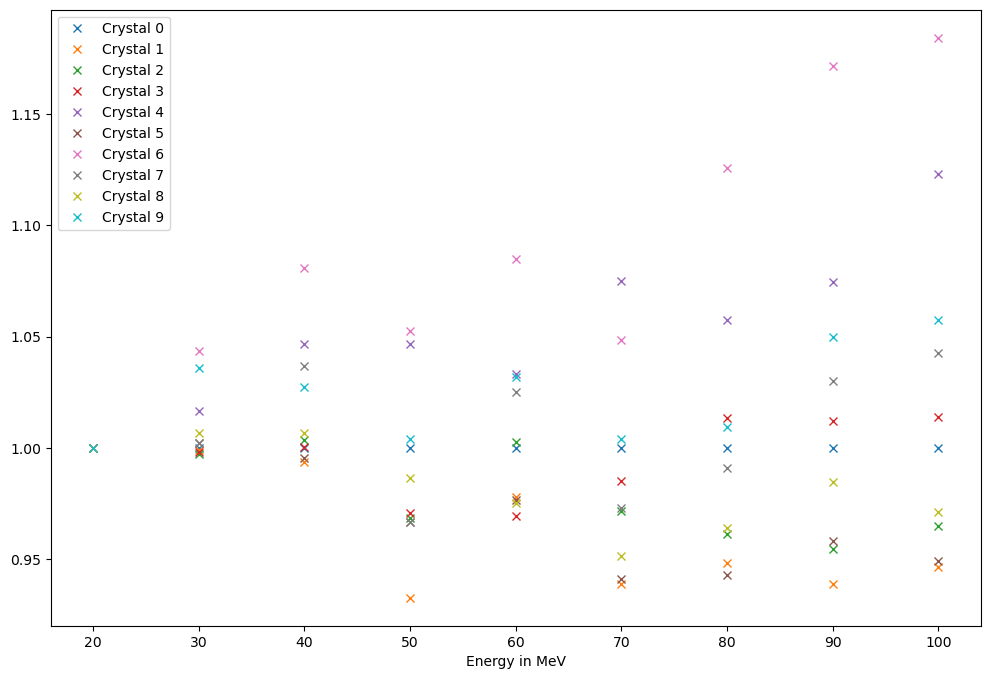

In [45]:
plt.figure(figsize = (12,8))
for crystal in np.unique(crystals):
    meanenergy20MeV = cconstants[(crystals == crystal) & (energies == 20)].mean()
    xdata = energies[crystals == crystal]
    ydata = cconstants[crystals == crystal]/meanenergy20MeV
    plt.plot(xdata,ydata,'x',label = f"Crystal {crystal}")

plt.xlabel("Energy in MeV")
plt.legend()
plt.show()